# Author: Mansi Gupta
## GRIP Jnue 2021

### Task3
In this task, we will perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. As a business manager, we will try to find out the weak areas where we can work to make more profit. Also, what all business problems can be derived by exploring the data. work to make more profit.

**Importing Dataset**

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [76]:
mg = pd.read_csv('SampleSuperstore.csv')
mg.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [77]:
mg.shape


(9994, 13)

In [4]:
mg.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Handling the missing data

In [5]:
mg.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Removing the duplicate records 

In [6]:
duplicate = mg.duplicated()
print(duplicate.sum())
mg[duplicate]

17


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [7]:
mg.drop_duplicates(inplace = True)
dup = mg.duplicated()
dup.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9977, dtype: bool>

In [8]:
mg.drop_duplicates(inplace = False)
dup = mg.duplicated()
dup.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9977, dtype: bool>

In [53]:
#dropping the irrelvant column
col = ['Postal Code']
mg = mg.drop(columns=col,axis=1)

In [54]:
mg.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.265077,-0.060828,0.450235
Quantity,0.265077,1.000000,0.008678,0.196670
Discount,-0.060828,0.008678,1.000000,-0.497723
Profit,0.450235,0.196670,-0.497723,1.000000


In [56]:
#covariance of columns
mg.cov()

,Sales,Quantity,Discount,Profit
Sales,28517.731032,99.674049,-2.120727,2244.072879
Quantity,99.674049,4.958001,0.003990,12.925020
Discount,-2.120727,0.003990,0.042624,-3.032866
Profit,2244.072879,12.925020,-3.032866,871.124541


## Data Visualization

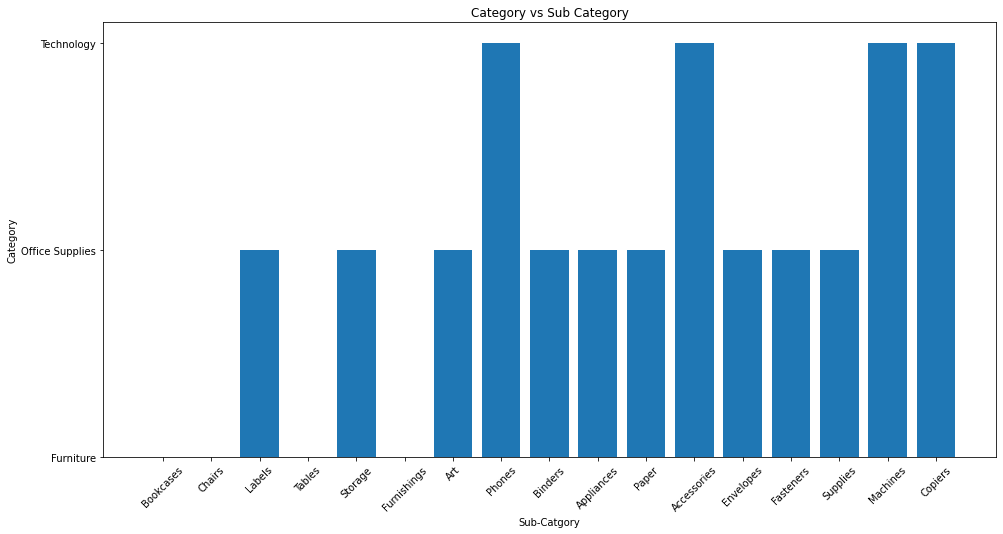

In [59]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=mg)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

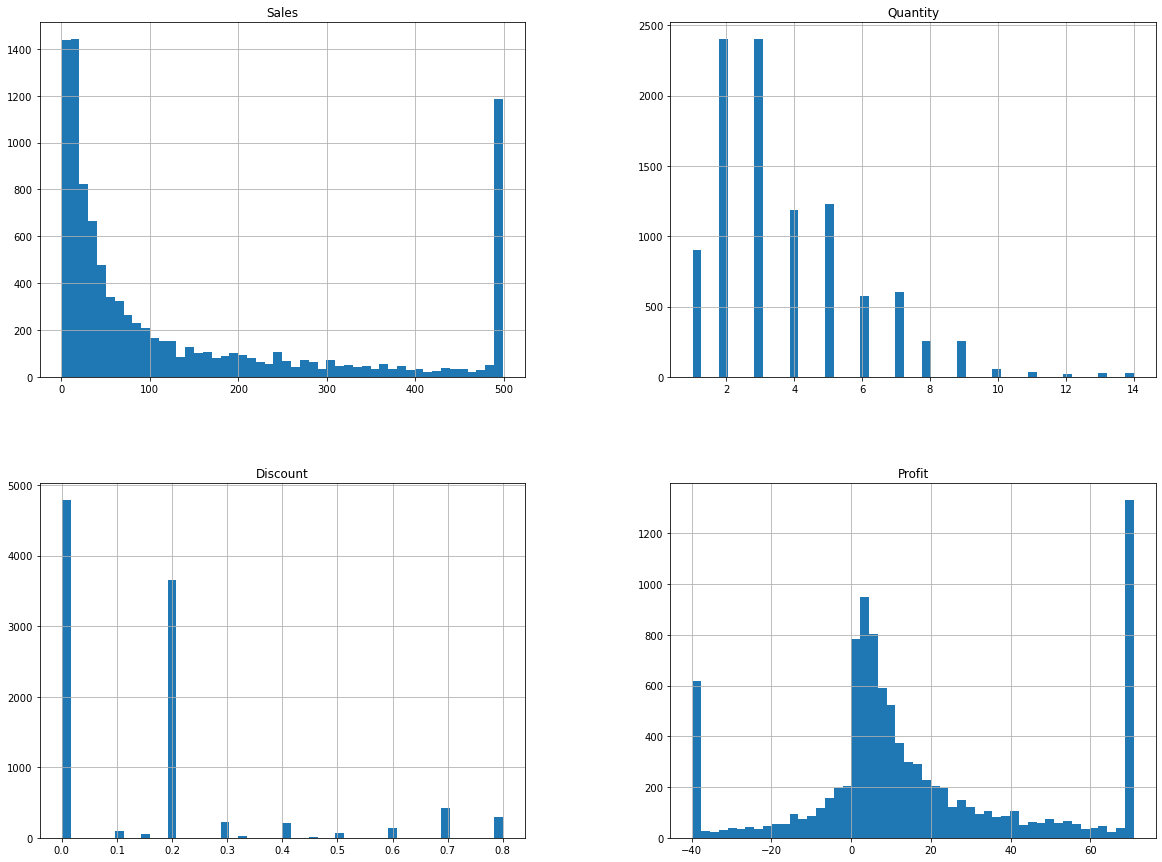

In [60]:
mg.hist(bins=50,figsize=(20,15))
plt.show();

In [61]:
# Count the total repeatable states
mg['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

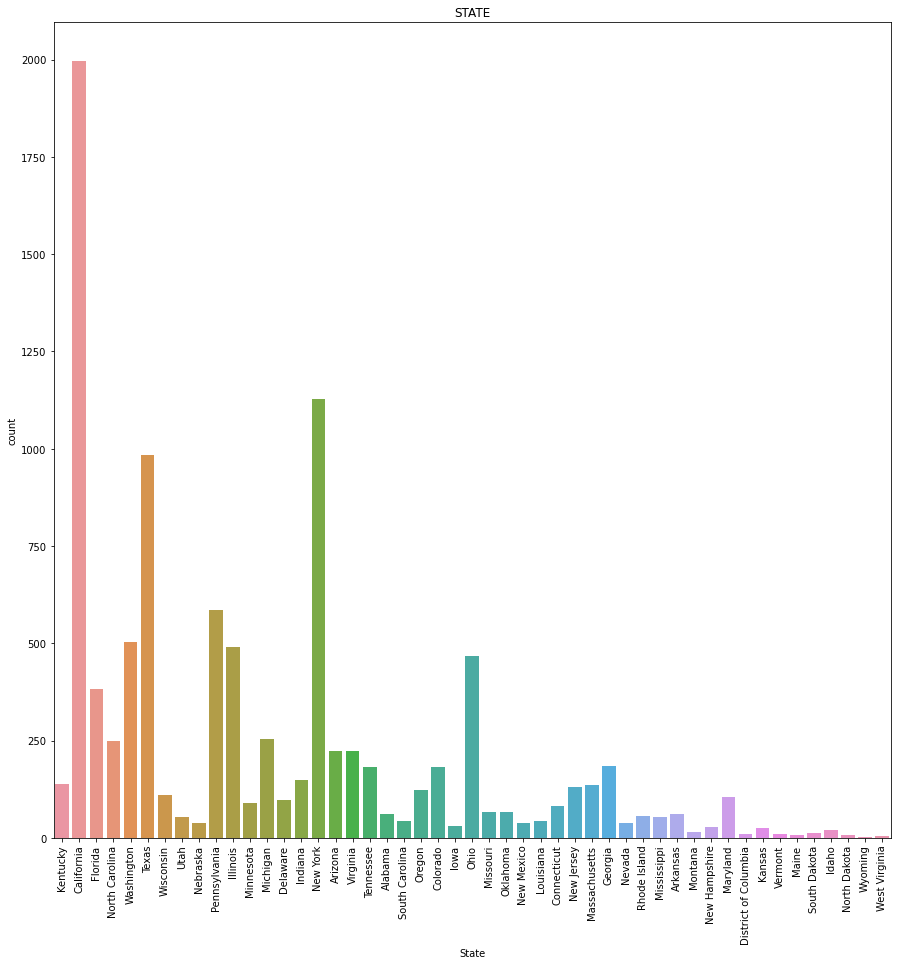

In [63]:
plt.figure(figsize=(15,15))
sns.countplot(x=mg['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

In [71]:
Profit_plot = (mg, plot(x='Category', y='Profit', fill='Sub-Category') + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)

NameError: name 'plot' is not defined

## Handling Outliners

<AxesSubplot:>

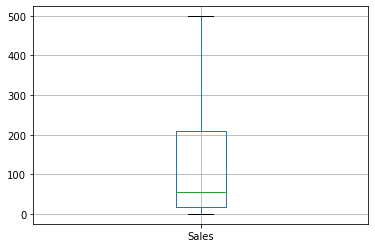

In [55]:
mg.boxplot(column = ['Sales'])

## Removing Outliners

In [10]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

In [14]:
lowsales,upsales = remove_outlier(mg['Sales'])
mg['Sales'] = np.where(mg['Sales']>upsales,upsales,mg['Sales'])
mg['Sales'] = np.where(mg['Sales']<lowsales,lowsales,mg['Sales'])

<AxesSubplot:>

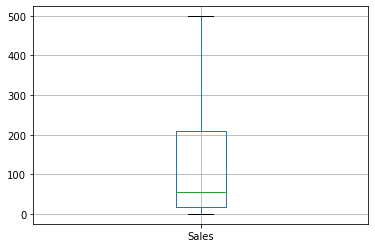

In [16]:
mg.boxplot(column=['Sales'])

<AxesSubplot:>

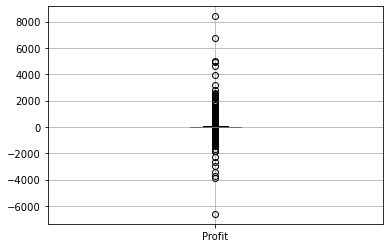

In [17]:
mg.boxplot(column=['Profit'])

In [20]:
lowprofit,highprofit = remove_outlier(mg['Profit'])
mg['Profit'] = np.where(mg['Profit']>highprofit,highprofit,mg['Profit'])
mg['Profit'] = np.where(mg['Profit']<lowprofit,lowprofit,mg['Profit'])

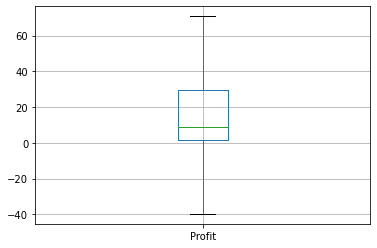

In [21]:
mg.boxplot(column=['Profit'])
plt.show()

<AxesSubplot:>

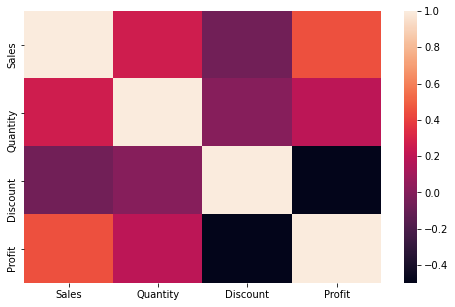

In [62]:
fig,axis = plt.subplots(1,1,figsize = (8,5))
sns.heatmap(mg.corr())

<ipython-input-26-fffc1255bed2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mg.groupby('Category')['Profit' , 'Sales'].agg(['sum']).plot.bar()


<Figure size 720x720 with 0 Axes>

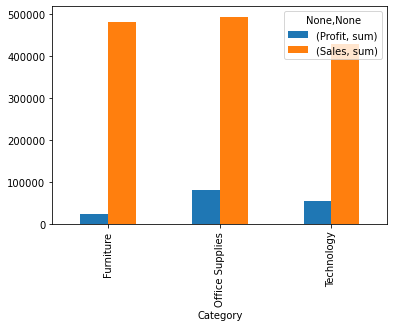

In [26]:
plt.figure(figsize=(10,10))
mg.groupby('Category')['Profit' , 'Sales'].agg(['sum']).plot.bar()
plt.show()

<ipython-input-27-9f18a5d338f5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mg.groupby('Sub-Category')['Profit' , 'Sales'].agg(['sum']).plot.bar()


<Figure size 720x720 with 0 Axes>

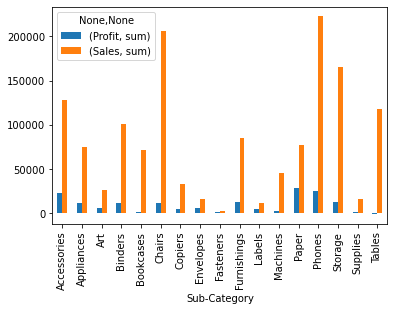

In [27]:
plt.figure(figsize=(10,10))
mg.groupby('Sub-Category')['Profit' , 'Sales'].agg(['sum']).plot.bar()
plt.show()

**&Here from the graph we can visualize that "binders" sub-category has suffered the highest amount of loss and also profit amongst all other sub-Categories (For now we can't say that what is the reason it may be because of discounts given on binders subcategory).
Next,"Copiers" sub-category has gained highest amount of profit with no loss.There are other sub-categories too haven't faced any kind of losses but their profit margins are also low.
Next, suffering from highest loss is machines**

<Figure size 1728x720 with 0 Axes>

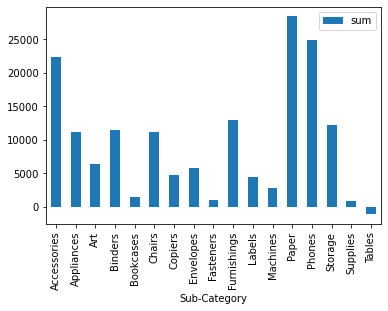

In [29]:
plt.figure(figsize=(24,10))
mg.groupby('Sub-Category')['Profit'].agg(['sum']).plot.bar()
plt.show()

**From the above Graph we can say that "Home Office" segment has less purchased sub-categories and in that "Tables", "Supplies", "Machines", "Copiers", "Bookcases" has the lowest sales. "Consumer" has purchased more sub-categories as compared to other segments.**

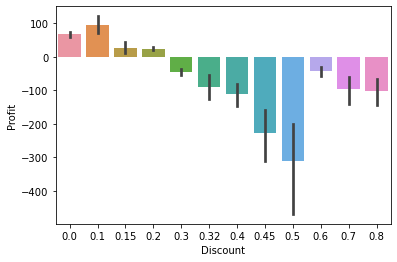

In [86]:
sns.barplot(x = mg.Discount ,y = mg.Profit)
plt.show()

<ipython-input-33-9ad40830bfd9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataplot = mg.groupby(['State'])['Sales', 'Profit'].sum()


<AxesSubplot:xlabel='State'>

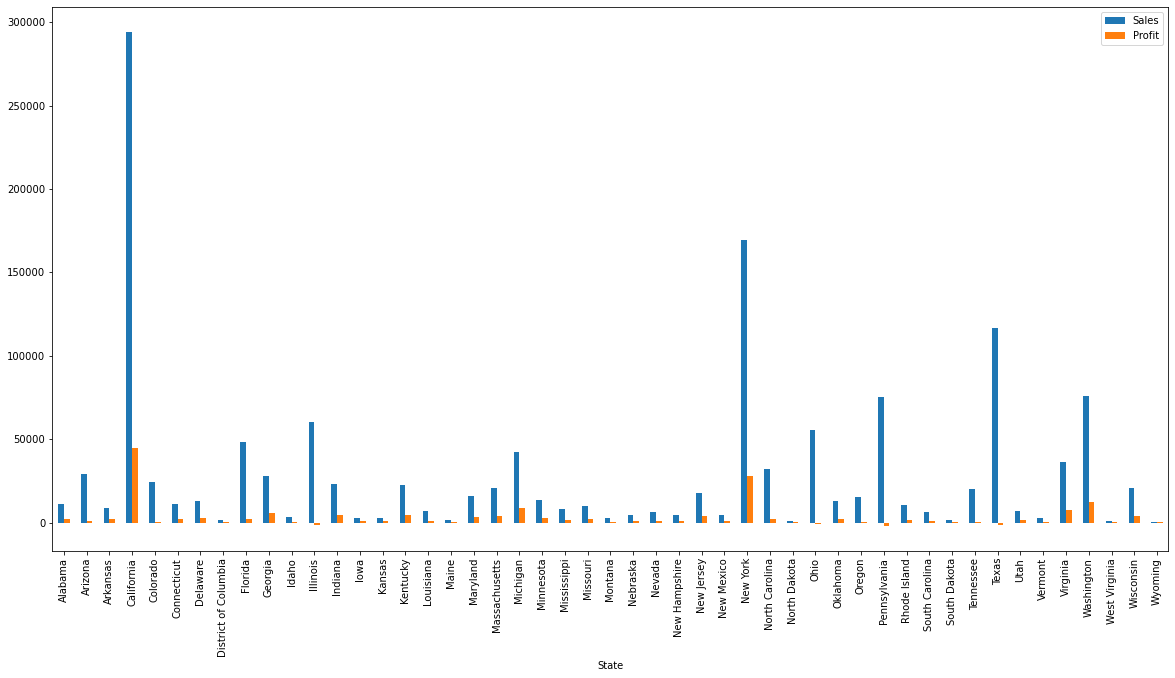

In [33]:
dataplot = mg.groupby(['State'])['Sales', 'Profit'].sum()
dataplot.plot.bar(figsize=(20,10))

In [35]:
mg['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [38]:
(mg['Ship Mode'].value_counts()/len(mg['Ship Mode']))*100

Standard Class    59.687281
Second Class      19.474792
First Class       15.405432
Same Day           5.432495
Name: Ship Mode, dtype: float64

<AxesSubplot:>

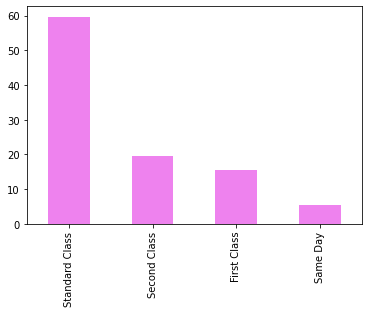

In [42]:
((mg['Ship Mode'].value_counts()/len(mg['Ship Mode']))*100).plot(kind = 'bar' ,color = 'violet')

In [45]:
mg['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [48]:
(mg['Category'].value_counts()/len(mg['Category']))*100

Office Supplies    60.258595
Furniture          21.228826
Technology         18.512579
Name: Category, dtype: float64

<AxesSubplot:>

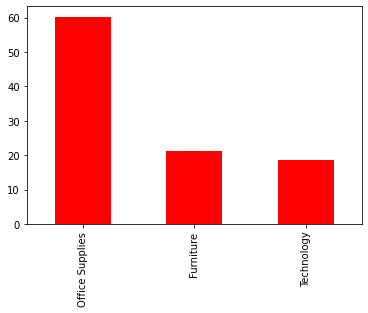

In [49]:
((mg['Category'].value_counts()/len(mg['Category']))*100).plot(kind = 'bar' ,color = 'red')

In [91]:

def state_data_viewer(states):
    """Plots the turnover generated by different product categories and sub-categories for the list of given states.
    Args:
        states- List of all the states you want the plots for
    Returns:
        None
    """
    product_data = mg.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

<ipython-input-91-1d9665add560>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-91-1d9665add560>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-91-1d9665add560>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-91-1d9665add560>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-91-1d9665add560>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


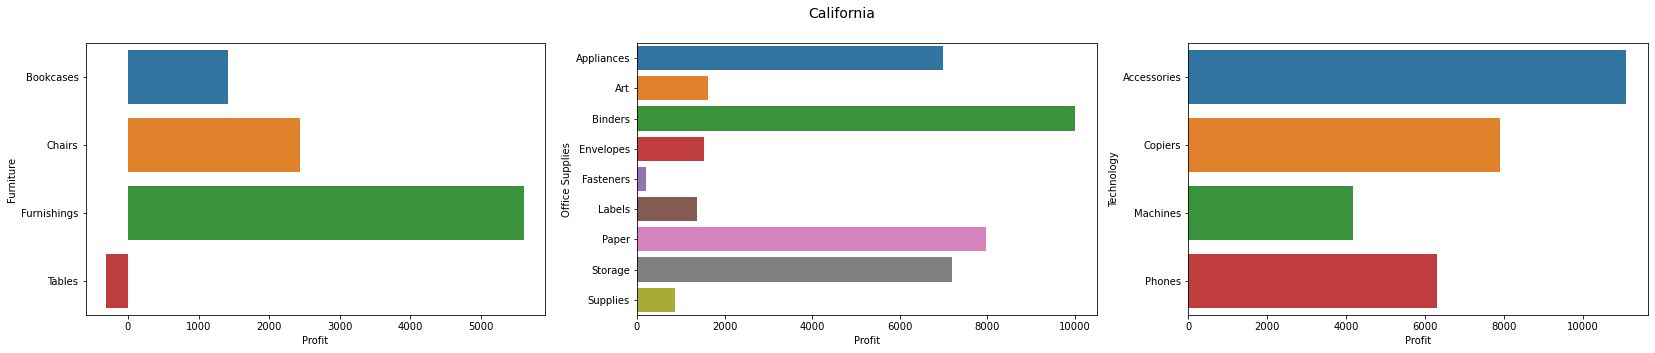

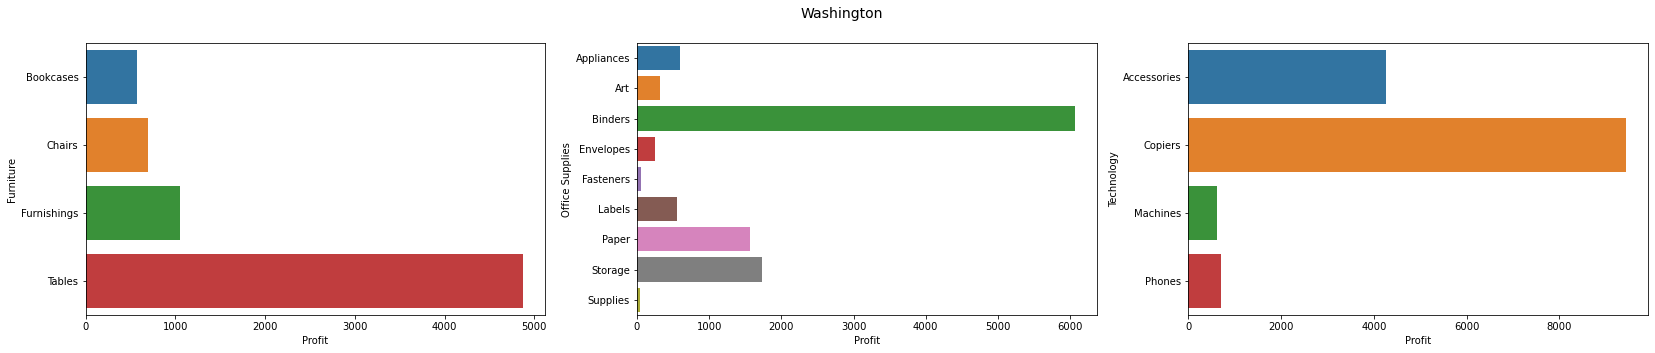

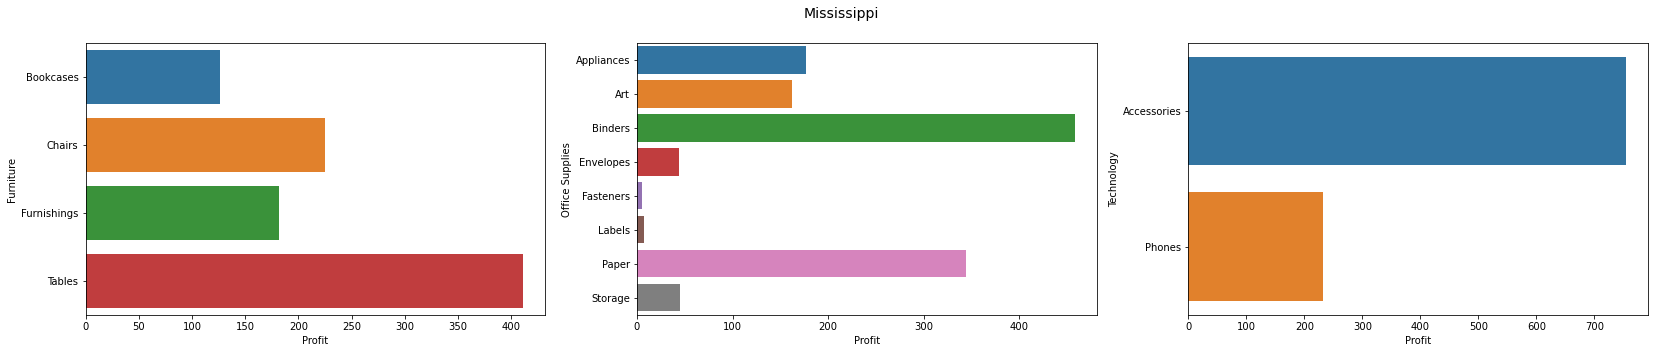

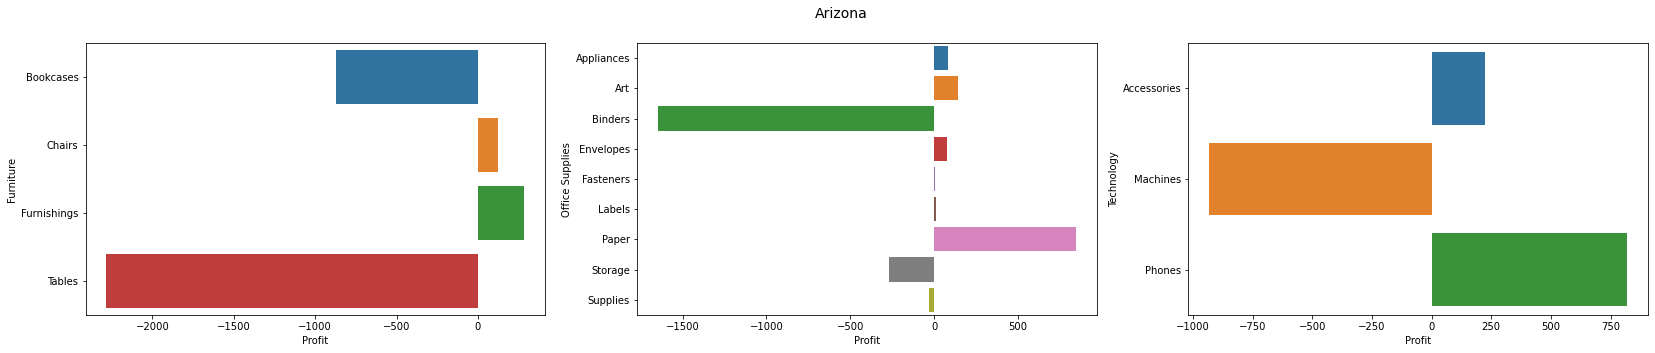

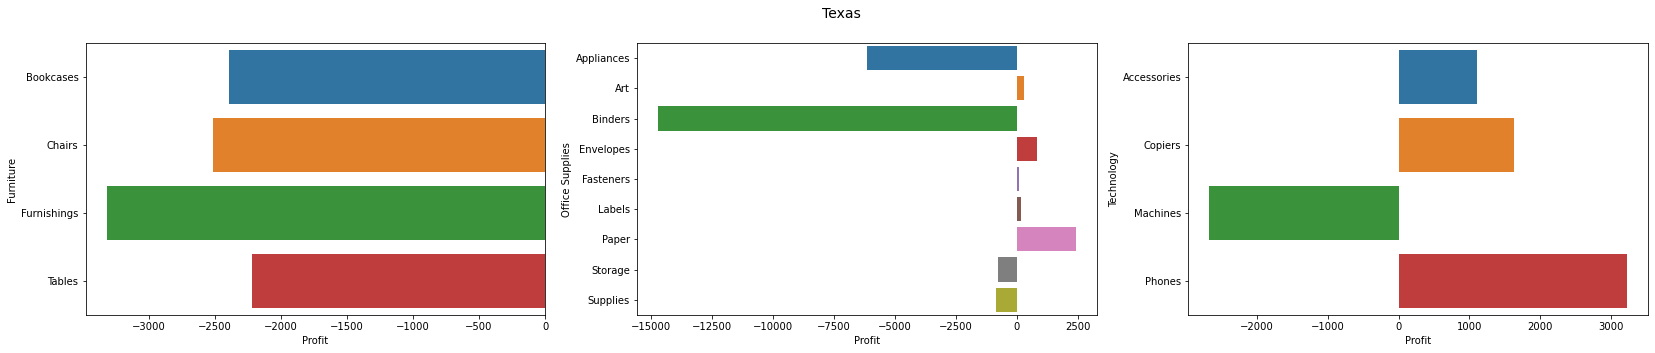

In [92]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

**From the above data visualization,we can see the states and the category where sales and profits are high or less. We can improve in those states by providing discounts in prefered range so that the company and cosumer will both be in profit. Here, while the superstore is incurring losses by providing discounts on their products, they can't stop doing so. Most of the heavy discounts are during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock. Also, by incurring small losses, the company gains in the future by attracting more long term customers. Therefore, the small losses from discounts are an essential part of company's businesses.**

### Thankyou